In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import time_series as ts

In [18]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
stock_data = ts.fetch_stock_data('AAPL', '2023-01-01', '2024-01-01', interval='1h')
stock_data.tail()
stock_data = stock_data[features]

X, y = ts.prepare_sequence_data(stock_data.to_numpy(), 4*7*8, 7*8, 3)
X_train, X_val, X_test, y_train, y_val, y_test = ts.time_series_split(X, y)

[*********************100%***********************]  1 of 1 completed


In [19]:
predictor = ts.StockPredictor(5)
predictor.setup_model(hidden_size = 100, num_layers = 2, normalize=True)
predictor.load_training_data(X_train, y_train)
predictor.load_validation_data(X_val, y_val)
predictor.load_test_data(X_test, y_test)
predictor.train(batch_size=32, num_epochs=10, learning_rate=0.001)

 10%|█         | 1/10 [00:03<00:32,  3.57s/it]

Epoch [1/10], Train Loss: 0.0836, Val Loss: 0.0125


 20%|██        | 2/10 [00:07<00:28,  3.53s/it]

Epoch [2/10], Train Loss: 0.0194, Val Loss: 0.0163


 30%|███       | 3/10 [00:10<00:24,  3.53s/it]

Epoch [3/10], Train Loss: 0.0134, Val Loss: 0.0170


 40%|████      | 4/10 [00:14<00:21,  3.55s/it]

Epoch [4/10], Train Loss: 0.0119, Val Loss: 0.0147


 50%|█████     | 5/10 [00:17<00:17,  3.58s/it]

Epoch [5/10], Train Loss: 0.0116, Val Loss: 0.0140


 60%|██████    | 6/10 [00:21<00:14,  3.61s/it]

Epoch [6/10], Train Loss: 0.0122, Val Loss: 0.0175


 70%|███████   | 7/10 [00:25<00:10,  3.61s/it]

Epoch [7/10], Train Loss: 0.0113, Val Loss: 0.0185


 80%|████████  | 8/10 [00:28<00:07,  3.63s/it]

Epoch [8/10], Train Loss: 0.0115, Val Loss: 0.0273


 90%|█████████ | 9/10 [00:32<00:03,  3.64s/it]

Epoch [9/10], Train Loss: 0.0117, Val Loss: 0.0143


100%|██████████| 10/10 [00:36<00:00,  3.63s/it]

Epoch [10/10], Train Loss: 0.0114, Val Loss: 0.0150


{'train_loss': [np.float64(0.08360023278038244),
  np.float64(0.01937874225345818),
  np.float64(0.0133644728040373),
  np.float64(0.011934551196424541),
  np.float64(0.01161579611535008),
  np.float64(0.012169156676611385),
  np.float64(0.011271173864401676),
  np.float64(0.011479687801486737),
  np.float64(0.011667678686412605),
  np.float64(0.011358242356092544)],
 'val_loss': [np.float64(0.012495668418705464),
  np.float64(0.0163324978784658),
  np.float64(0.017006871243938803),
  np.float64(0.01468355196993798),
  np.float64(0.014014791522640735),
  np.float64(0.017450309405103327),
  np.float64(0.018511283304542304),
  np.float64(0.02726106987101957),
  np.float64(0.01431266099680215),
  np.float64(0.015008937078528106)]}

In [14]:
predictor.predict()

array([178.5724 , 178.53656, 178.56989, 178.68465, 178.67862, 178.5965 ,
       178.26993, 177.76968, 177.26552, 176.91614, 176.69362, 176.50299,
       176.29129, 175.7499 , 175.33076, 175.10156, 175.05002, 175.12834,
       175.2423 , 175.32448, 175.26784, 175.19914, 175.1225 , 175.02742,
       174.99342, 175.04651, 175.18425, 175.05902, 174.93643, 174.83215,
       174.68188, 174.50511, 174.3401 , 174.16501, 173.7235 , 173.04866,
       172.24036, 171.44751, 170.79784, 170.38005, 170.05751, 169.80153,
       169.76932, 169.86298, 169.91916, 169.94179, 169.99216, 170.06316,
       170.22482, 170.47845, 170.79123, 171.08775, 171.41437, 171.69836,
       171.92076, 171.90862, 171.87508, 171.85954, 171.92365, 172.06233,
       172.24011, 172.44498, 172.61844, 172.8342 , 173.08986, 173.38199,
       173.68614, 173.9805 , 174.35075, 174.89714, 175.57642, 176.26353,
       176.90852, 177.49419, 177.96875, 178.32838, 177.99066, 177.66464,
       177.4613 , 177.44644, 177.47609, 177.56685, 

In [15]:
y_test

array([173.55999756, 174.17999268, 173.58000183, 173.38000488,
       172.83999634, 171.58999634, 172.80999756, 172.83999634,
       173.30999756, 173.38000488, 173.13299561, 172.96000671,
       172.83000183, 172.30499268, 172.08000183, 172.19000244,
       172.75999451, 173.58500671, 173.38999939, 172.13000488,
       172.44500732, 171.76499939, 171.14500427, 171.41999817,
       171.17500305, 171.08999634, 168.66000366, 166.94960022,
       166.2973938 , 165.94999695, 167.17999268, 167.31430054,
       166.75999451, 168.16000366, 168.73500061, 167.75999451,
       167.19000244, 167.69500732, 167.99000549, 168.28500366,
       169.375     , 169.66999817, 169.46609497, 169.91990662,
       170.36000061, 169.85499573, 170.24000549, 169.13000488,
       169.22999573, 169.55000305, 170.28199768, 169.96000671,
       170.64500427, 170.78999329, 171.83000183, 171.42999268,
       171.8999939 , 172.16200256, 172.61000061, 173.91000366,
       173.91999817, 176.86999512, 176.77400208, 176.97

[177.19003 177.19377 177.1662  177.0731  176.95454 176.88896 176.85896
 176.87607 176.94618 176.936   176.88559 176.66425 176.35065 176.04324
 175.8244  175.67738 175.53714 175.37357 174.98041 174.69064 174.52184
 174.46259 174.4799  174.51784 174.53911 174.46771 174.41011 174.35995
 174.29941 174.27414 174.29057 174.36046 174.25499 174.16548 174.10545
 174.01656 173.90454 173.79686 173.6676  173.36191 172.91629 172.38596
 171.85635 171.39676 171.06026 170.76793 170.50133 170.40211 170.40755
 170.39705 170.36414 170.35243 170.35948 170.41695 170.5577  170.76292
 170.96683 171.19304 171.39325 171.55579 171.56856 171.5813  171.60605
 171.67651 171.78738 171.91985 172.06349 172.17404 172.32442 172.51642
 172.73488 172.95668 173.16003 173.41556 173.77304 174.22829 174.70988
 175.17369 175.60284 175.95667 176.23212 176.03065 175.89166 175.84323
 175.89919 175.96104 176.04225 176.14218 176.17444 176.39412 176.72098
 177.03442 177.30675 177.56125 177.77405 177.8973  178.13835 178.41687
 178.7

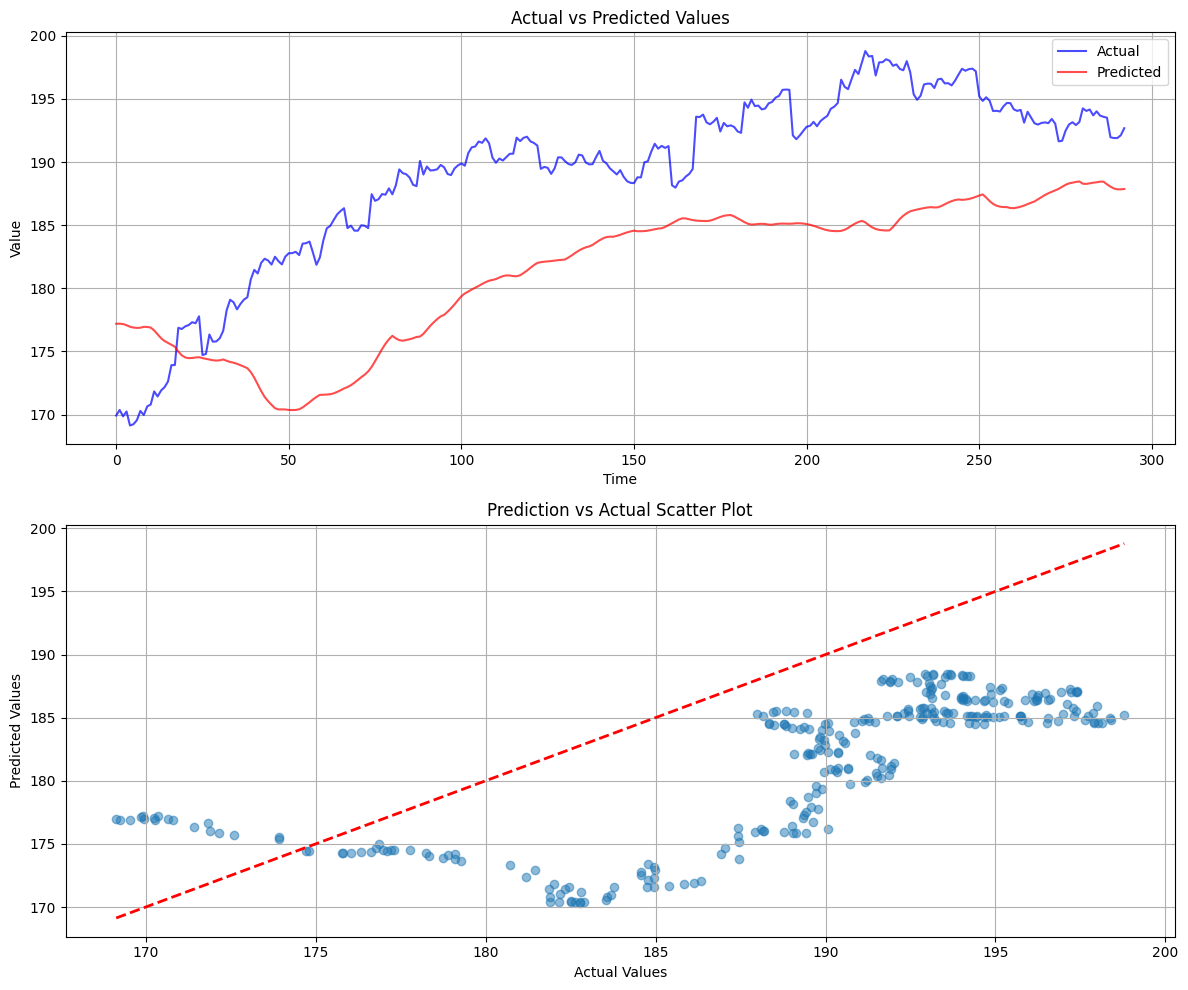

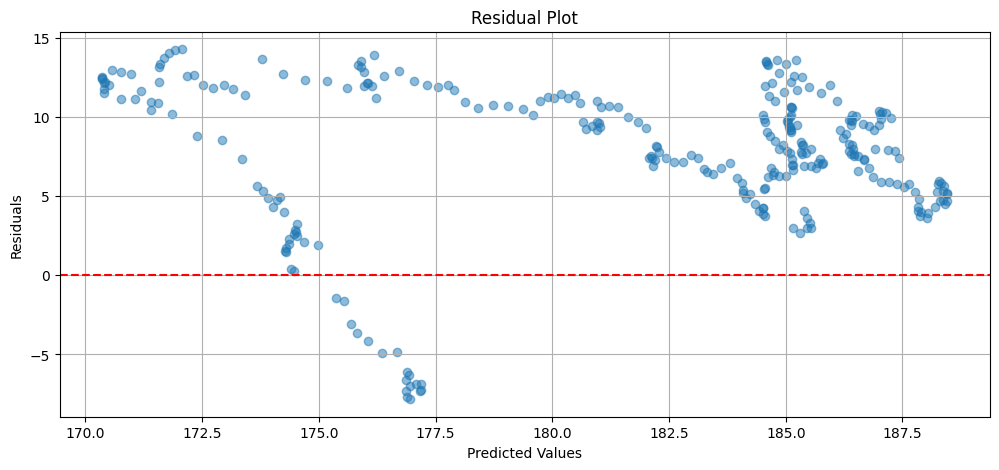

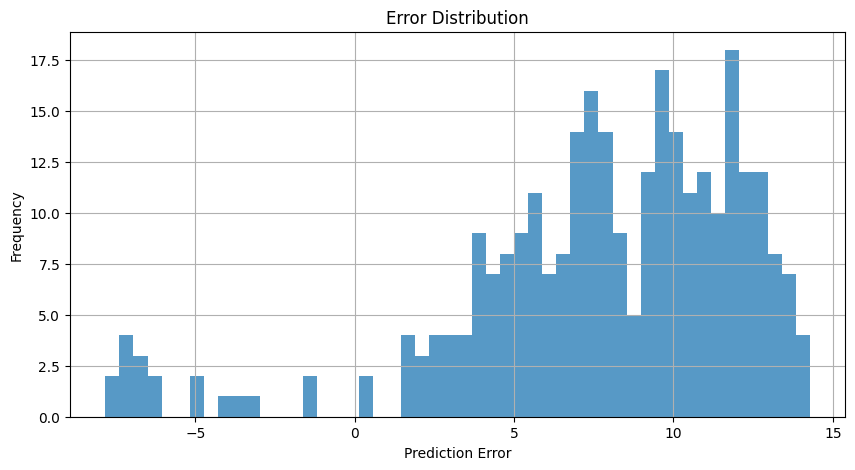

{'mse': np.float64(80.617015824565),
 'rmse': np.float64(8.978697891374061),
 'mae': np.float64(8.370086617844096),
 'r2': -0.6172981349364945,
 'mape': np.float64(4.411529090852588),
 'direction_accuracy': np.float64(44.86301369863014)}

In [20]:
predictor.evaluate_test_set(display_plots=True)

# Predicting Opening Prices of a Stock

First, we use the yfinance library to retrieve the opening prices of a AAPL for 2022.

In [3]:

ticker = "GOOG" 
start_date = "2023-01-01"
end_date = "2024-01-01"
df = time_series.fetch_stock_data(ticker, start_date, end_date, interval="1h")
df.head()

AttributeError: module 'time_series' has no attribute 'fetch_stock_data'

We plot the data below.

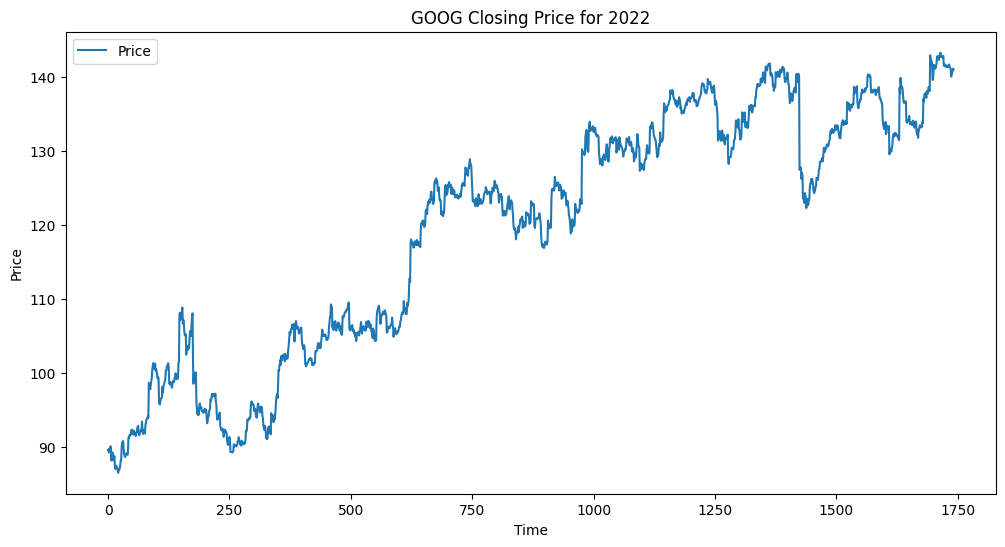

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'].values, label='Price')
plt.legend()
plt.title(f'{ticker} Closing Price for 2022')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

We prepare the data by extracting the feature we'll be predicting (opening price) and normalizing it. We keep track of the scaler in case we need to retrieve the original values later.

In [25]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X, y, X_future, scaler = time_series.prepare_data(df, features)

Training sequences shape: (1678, 56, 5)
Target values shape: (1678,)
Future sequence shape: (1, 56, 5)
Last date in training: 2023-12-15 15:30:00-05:00
Prediction will be for: 2024-01-06 15:30:00-05:00


In [26]:
X_future

array([[[0.90697873, 0.90904853, 0.9082183 , 0.90864281, 0.13154911],
        [0.90873894, 0.90026095, 0.90525201, 0.90371412, 0.06123587],
        [0.9036345 , 0.89859129, 0.90664796, 0.90248182, 0.02700087],
        [0.90222639, 0.89894287, 0.90917813, 0.91055788, 0.02247264],
        [0.91023487, 0.9072909 , 0.91746623, 0.91849831, 0.03597517],
        [0.91824335, 0.90808175, 0.91415115, 0.90864281, 0.01967017],
        [0.90821093, 0.90377593, 0.91205709, 0.90934679, 0.06663532],
        [0.94878107, 0.98427016, 0.95454527, 0.99375091, 0.45390134],
        [0.9934136 , 0.98476736, 0.98499388, 0.98210685, 0.12241453],
        [0.98195883, 0.97073722, 0.97958475, 0.97905294, 0.05681075],
        [0.97870269, 0.96985841, 0.98220199, 0.98019715, 0.05330657],
        [0.98002271, 0.97145781, 0.97932302, 0.97280412, 0.04406355],
        [0.97254251, 0.96124675, 0.94189493, 0.93504661, 0.15435585],
        [0.93478832, 0.93453244, 0.93945209, 0.93627865, 0.11847541],
        [0.95573353,

In [27]:
X.shape

(1678, 56, 5)

Split into train/test sets.

In [28]:
X_train, X_test, y_train, y_test = time_series.time_series_split(X, y, test_size=0.2)

Training samples: 1342
Test samples: 336
Training date range: 1342 hours


Here we make use of the Dataset and Dataloader Pytorch classes to decouple dataset management with model training.

In [29]:
batch_size = 16
train_dataset = time_series.StockDataset(X_train, y_train)
test_dataset = time_series.StockDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [30]:
train_dataset.__getitem__(0)[0].shape

torch.Size([56, 5])

We define our model LSTM model below.

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

We initialize the model and train below.

In [31]:
learning_rate = 0.001
input_size = len(features)
num_layers = 1
hidden_size = input_size



model = time_series.LSTMModel(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

LSTMModel(
  (lstm): LSTM(5, 5, batch_first=True)
  (fc): Linear(in_features=5, out_features=1, bias=True)
)

In [32]:
num_epochs = 20
for epoch in tqdm(range(num_epochs)):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        outputs = model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

  5%|▌         | 1/20 [00:00<00:05,  3.58it/s]

Epoch [1/20], Loss: 0.0465


 10%|█         | 2/20 [00:00<00:04,  3.80it/s]

Epoch [2/20], Loss: 0.0096


 15%|█▌        | 3/20 [00:00<00:04,  3.88it/s]

Epoch [3/20], Loss: 0.0022


 20%|██        | 4/20 [00:01<00:04,  3.93it/s]

Epoch [4/20], Loss: 0.0032


 25%|██▌       | 5/20 [00:01<00:03,  3.91it/s]

Epoch [5/20], Loss: 0.0008


 30%|███       | 6/20 [00:01<00:03,  3.90it/s]

Epoch [6/20], Loss: 0.0034


 35%|███▌      | 7/20 [00:01<00:03,  3.92it/s]

Epoch [7/20], Loss: 0.0016


 40%|████      | 8/20 [00:02<00:03,  3.98it/s]

Epoch [8/20], Loss: 0.0029


 45%|████▌     | 9/20 [00:02<00:02,  4.01it/s]

Epoch [9/20], Loss: 0.0017


 50%|█████     | 10/20 [00:02<00:02,  4.05it/s]

Epoch [10/20], Loss: 0.0028


 55%|█████▌    | 11/20 [00:02<00:02,  3.97it/s]

Epoch [11/20], Loss: 0.0023


 60%|██████    | 12/20 [00:03<00:01,  4.03it/s]

Epoch [12/20], Loss: 0.0026


 65%|██████▌   | 13/20 [00:03<00:01,  4.08it/s]

Epoch [13/20], Loss: 0.0044


 70%|███████   | 14/20 [00:03<00:01,  4.11it/s]

Epoch [14/20], Loss: 0.0024


 75%|███████▌  | 15/20 [00:03<00:01,  4.13it/s]

Epoch [15/20], Loss: 0.0006


 80%|████████  | 16/20 [00:03<00:00,  4.13it/s]

Epoch [16/20], Loss: 0.0025


 85%|████████▌ | 17/20 [00:04<00:00,  4.15it/s]

Epoch [17/20], Loss: 0.0028


 90%|█████████ | 18/20 [00:04<00:00,  4.13it/s]

Epoch [18/20], Loss: 0.0011


 95%|█████████▌| 19/20 [00:04<00:00,  4.15it/s]

Epoch [19/20], Loss: 0.0010


100%|██████████| 20/20 [00:04<00:00,  4.04it/s]

Epoch [20/20], Loss: 0.0014


We now get the predictions on the test set and plot them against the actual values. We make sure to transform them back from their normalized values.

In [16]:
model.eval()
with torch.no_grad():
    predictions = []
    actuals = []
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X)
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(batch_y.numpy())

print(predictions[0].shape)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

mse = np.mean((predictions - actuals) ** 2)
print(f'Test MSE: {mse:.4f}')

(1,)
Test MSE: 10.3254


In [17]:
predictions

array([138.55421 , 138.62372 , 138.66641 , 138.57098 , 138.38297 ,
       138.23907 , 138.28406 , 137.74423 , 137.38544 , 137.36107 ,
       137.26938 , 137.12393 , 137.07265 , 137.03313 , 136.89171 ,
       137.01152 , 137.13124 , 137.25403 , 137.36577 , 137.34846 ,
       137.84276 , 137.94997 , 137.85953 , 137.85759 , 137.99763 ,
       138.2178  , 138.47076 , 136.94925 , 133.96605 , 132.47382 ,
       131.44807 , 130.53214 , 129.70605 , 129.19647 , 127.90397 ,
       126.280815, 125.50016 , 124.79406 , 124.38761 , 124.37872 ,
       124.18414 , 124.03945 , 123.068115, 122.98376 , 122.79737 ,
       122.70361 , 122.86524 , 123.019844, 123.74561 , 123.95413 ,
       124.31174 , 124.732025, 125.19086 , 125.55765 , 125.8099  ,
       125.99206 , 125.63181 , 125.329056, 125.17353 , 125.18228 ,
       125.2715  , 125.456604, 125.85415 , 125.91743 , 125.99497 ,
       126.098236, 126.409706, 126.85803 , 126.9891  , 127.93294 ,
       127.80652 , 128.02115 , 128.22075 , 128.50607 , 128.721

Below is the plot of the actual vs. predicted stock price. We see it performs well.

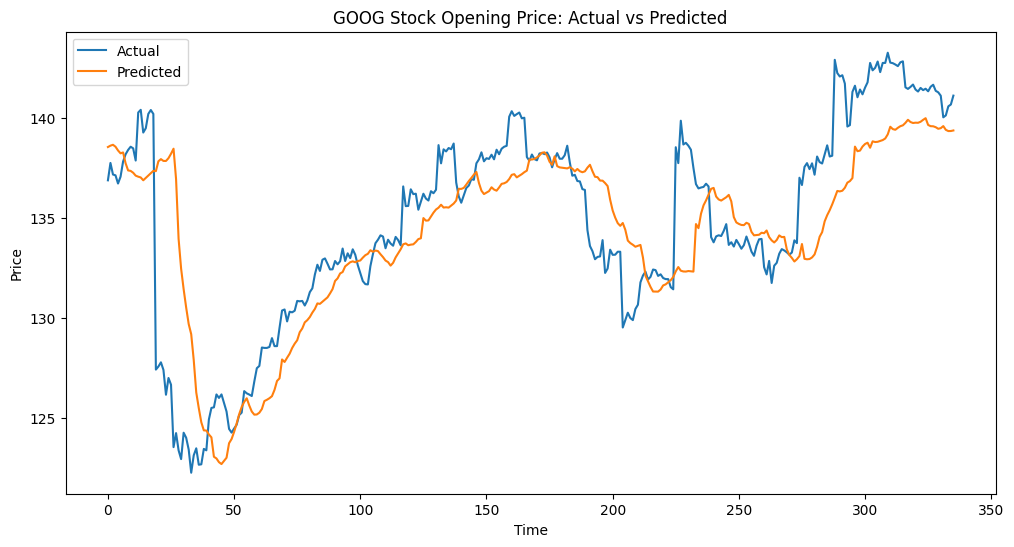

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(actuals, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title(f'{ticker} Stock Opening Price: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [36]:
def predict_future_price(model, last_sequence, target_scaler, device='cpu'):
    """
    Predict the future price using the last available sequence.
    
    Args:
        model: Trained LSTM model
        last_sequence: Last sequence of data
        target_scaler: Scaler used for the target variable
        device: Device to run prediction on
    """
    model.eval()
    
    with torch.no_grad():
        sequence = torch.FloatTensor(last_sequence).to(device)
        pred = model(sequence)
        pred = target_scaler.inverse_transform(pred.cpu().numpy())
        
    return pred[0][0]

In [35]:
time_series.predict_future_price(model, X_future, scaler, device)

np.float32(140.14853)